In [3]:
data.head()


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('/content/patients.csv')
print("Dataset loaded successfully!")
print(data.head())

# Convert satisfaction (numeric) into categorical target
data['target'] = np.where(data['satisfaction'] >= 70, 'High', 'Low')

# Drop unnecessary columns
X = data.drop(['patient_id', 'name', 'arrival_date', 'departure_date', 'satisfaction', 'target'], axis=1)

# Convert categorical 'service' column to numeric
X = pd.get_dummies(X, drop_first=True)

y = data['target']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
accuracies = []

# Perform K-Fold training
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

print("\nAverage Accuracy:", np.mean(accuracies))


Dataset loaded successfully!
     patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22   
1  PAT-f0644084     Shannon Walker    6   2025-12-13     2025-12-14   
2  PAT-ac6162e4       Julia Torres   24   2025-06-29     2025-07-05   
3  PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
4  PAT-08591375        Garrett Lin   25   2025-02-18     2025-02-25   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76  
Fold 1 Accuracy: 0.7500
Fold 2 Accuracy: 0.7150
Fold 3 Accuracy: 0.7850
Fold 4 Accuracy: 0.7300
Fold 5 Accuracy: 0.8050

Average Accuracy: 0.757


In [12]:
data.isnull().sum().sum()

np.int64(0)

✅ Dataset loaded successfully!
Shape: (1000, 7)

Columns:
 ['patient_id', 'name', 'age', 'arrival_date', 'departure_date', 'service', 'satisfaction']

First 5 rows:
      patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22   
1  PAT-f0644084     Shannon Walker    6   2025-12-13     2025-12-14   
2  PAT-ac6162e4       Julia Torres   24   2025-06-29     2025-07-05   
3  PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
4  PAT-08591375        Garrett Lin   25   2025-02-18     2025-02-25   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76  


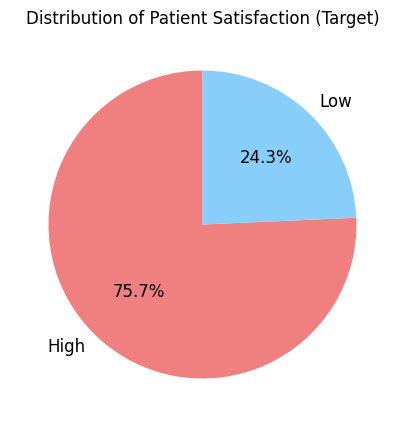

Fold 1 Accuracy: 0.7100
Fold 2 Accuracy: 0.7400
Fold 3 Accuracy: 0.7850
Fold 4 Accuracy: 0.7800
Fold 5 Accuracy: 0.7700

📊 Average Accuracy: 0.7569999999999999
Standard Deviation: 0.02821347195933179


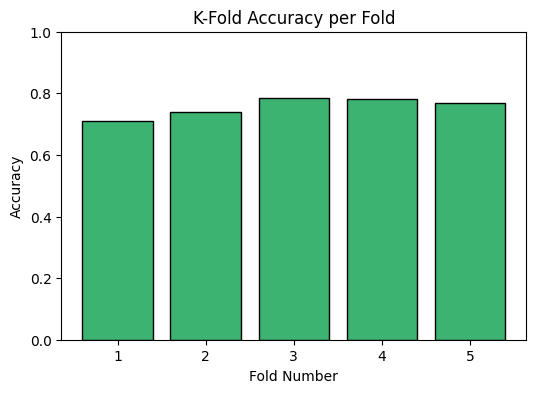

In [8]:
# ----------------------------------------------------
# K-Fold Classification on Patients Dataset + Visualizations
# ----------------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Step 2: Load dataset
data = pd.read_csv('/content/patients.csv')
print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nColumns:\n", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())

# Step 3: Shuffle to avoid order bias
data = shuffle(data, random_state=42)

# Step 4: Create target column from satisfaction
data['target'] = np.where(data['satisfaction'] >= 70, 'High', 'Low')

# Step 5: Plot distribution of target (Pie Chart)
x = data['target'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral','lightskyblue'],
        textprops={'fontsize': 12})
plt.title('Distribution of Patient Satisfaction (Target)')
plt.show()

# Step 6: Prepare features (X) and target (y)
X = data.drop(['patient_id', 'name', 'arrival_date', 'departure_date', 'satisfaction', 'target'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['target']

# Step 7: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Initialize K-Fold and Model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
accuracies = []

# Step 9: Perform K-Fold
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

# Step 10: Show overall performance
print("\n📊 Average Accuracy:", np.mean(accuracies))
print("Standard Deviation:", np.std(accuracies))

# Step 11: Bar Chart of Fold Accuracies
plt.figure(figsize=(6,4))
plt.bar(range(1,6), accuracies, color='mediumseagreen', edgecolor='black')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('K-Fold Accuracy per Fold')
plt.ylim(0, 1)
plt.show()